<h1 align = "center"> LINEAR REGRESSION</h1>

<h1 align = "center"> USING SALINITY TO PREDICT TEMPERATURE OF WATER</h1>

#<h2>Nithin Shanmugam V (RA1911026020087)</h2>

#<h2>Subject: VAC</h2>

#<h3> Importing libraries</h3>

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#<h3> Importing Dataset</h3>

In [4]:
dataset = pd.read_csv("/content/temp-salinity-pred.csv")

In [5]:
dataset

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421
...,...,...,...,...,...,...,...
502,17,503,072.0 056.0,19-4903CR-HY-066-0000-07200560-0000B-3,0,12.00,33.310
503,17,504,072.0 056.0,19-4903CR-HY-066-0000-07200560-0010A-3,10,11.88,33.260
504,17,505,072.0 056.0,19-4903CR-HY-066-0000-07200560-0020A-7,20,11.74,33.265
505,17,506,072.0 056.0,19-4903CR-HY-066-0000-07200560-0025A-3,25,11.66,33.280


In [6]:
dataset1 = dataset

#<h3> Slicing the dat set - Removing the columns</h3>

In [7]:
dataset1 = dataset1.drop(columns=["Cst_Cnt","Btl_Cnt", "Sta_ID", "Depth_ID",	"Depthm"])

In [8]:
dataset1 = dataset1.dropna()

In [9]:
print(dataset1)

     T_degC  Salnty
0     10.50  33.440
1     10.46  33.440
2     10.46  33.437
3     10.45  33.420
4     10.45  33.421
..      ...     ...
502   12.00  33.310
503   11.88  33.260
504   11.74  33.265
505   11.66  33.280
506   11.55  33.296

[500 rows x 2 columns]


#<h3>Segregate and reshape the dataset</h3>

In [10]:
x = dataset1.iloc[:,0]

In [11]:
x.shape

(500,)

In [12]:
x = dataset1.iloc[:,0].values.reshape(-1,1)

In [13]:
x.shape

(500, 1)

In [14]:
y = dataset1.iloc[:,-1].values.reshape(-1,1)

In [15]:
y.shape

(500, 1)

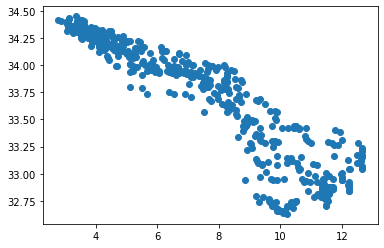

In [16]:
plt.scatter(x,y)
plt.show()

#<h3>Split the dataset into training and test set</h3>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

#<h3>Check training and test dataset</h3>

In [19]:
x_train.shape

(400, 1)

In [20]:
x_test.shape

(100, 1)

In [21]:
y_train.shape

(400, 1)

In [22]:
y_test.shape

(100, 1)

#<h3>Import the function for linear regression</h3>

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#<h3>Predict the temperature(by using salinity) using test dataset</h3>

In [26]:
y_pred = lm.predict(x_test)

#<h3>Check the prediction</h3>

In [27]:
check = pd.DataFrame(x_test, columns = ['Salinity'])

In [28]:
check['Temperature_Actual'] = y_test

In [29]:
check['Temperature_Predicted'] = y_pred

In [30]:
check

,Salinity,Temperature_Actual,Temperature_Predicted
0,3.35,34.450,34.419237
1,10.67,33.150,33.126473
2,11.31,32.827,33.013444
3,8.20,33.780,33.562693
4,3.76,34.250,34.346828
...,...,...,...
95,11.48,32.781,32.983421
96,3.62,34.378,34.371553
97,9.38,33.300,33.354296
98,10.20,32.630,33.209478


#<h3>Check using regression line</h3>

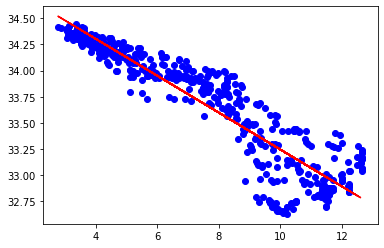

In [31]:
plt.scatter(x,y, color = 'blue')
plt.plot(x_test,y_pred,color = 'red')

#<h3>Checking the accuracy</h3>

In [32]:
lm.score(x_train,y_train)

0.8433313476826455

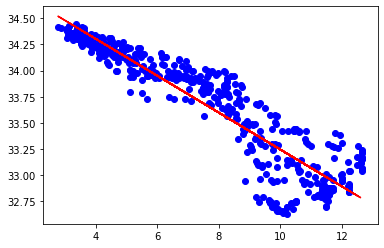

In [33]:
plt.scatter(x,y,color='blue')
plt.plot(x_test,y_pred,color='red')